
**Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.**

In [ ]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='energy-efficiency', as_frame=True)
X, y1 = dataset["data"], dataset["target"]

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      768 non-null    float64 
 1   V2      768 non-null    float64 
 2   V3      768 non-null    float64 
 3   V4      768 non-null    float64 
 4   V5      768 non-null    float64 
 5   V6      768 non-null    float64 
 6   V7      768 non-null    float64 
 7   V8      768 non-null    float64 
 8   y2      768 non-null    category
dtypes: category(1), float64(8)
memory usage: 50.2 KB


In [ ]:
y2 = X["y2"]
X = X.drop(columns=["y2"])
X

,V1,V2,V3,V4,V5,V6,V7,V8
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0


**Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.**



Датасет содержит различные параметры здания, с помощью модели класификации мы сможем предугадать по параметрам какой класс енергопотребления будет у здания.
В датасете также есть 2 целевых переменных: y1 Тепловая нагрузка, y2 Охлаждающая нагрузка

**Постройте гистограммы распределения по каждому признаку.**

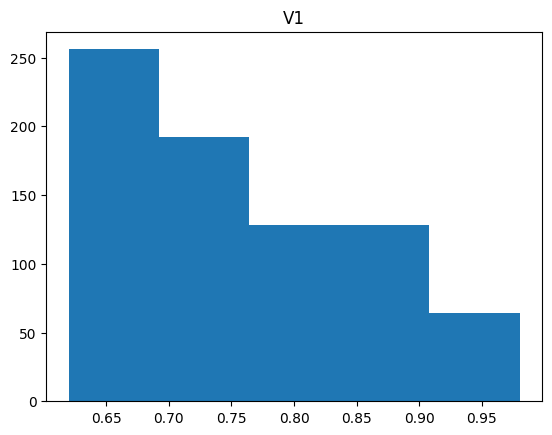

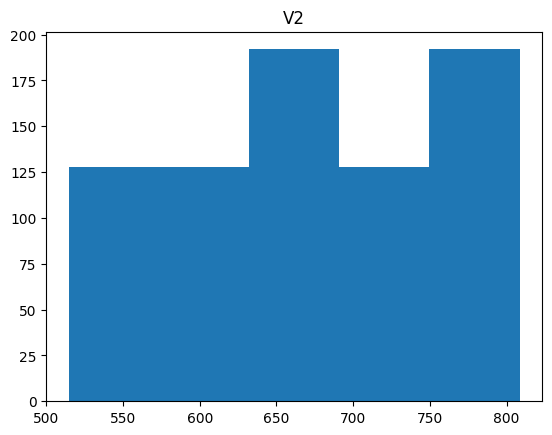

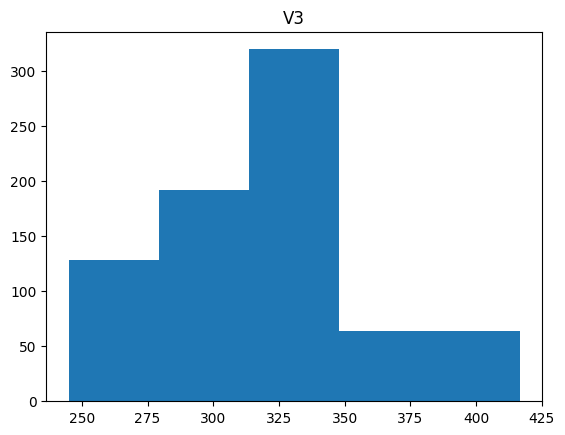

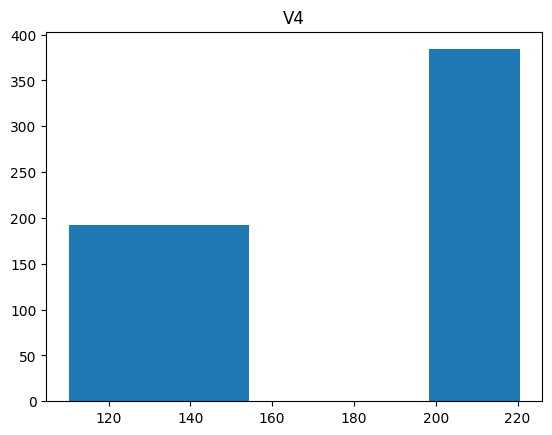

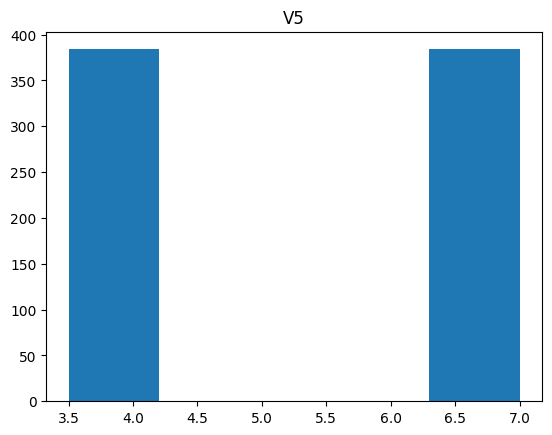

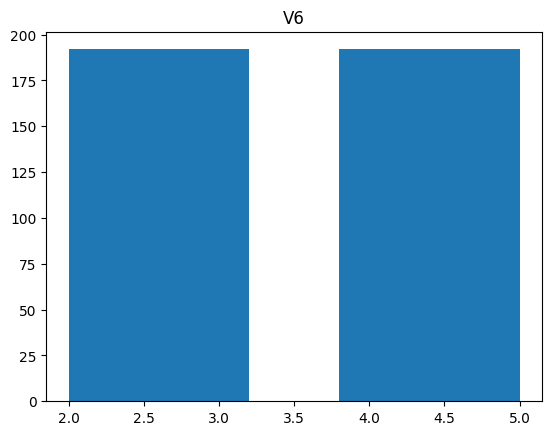

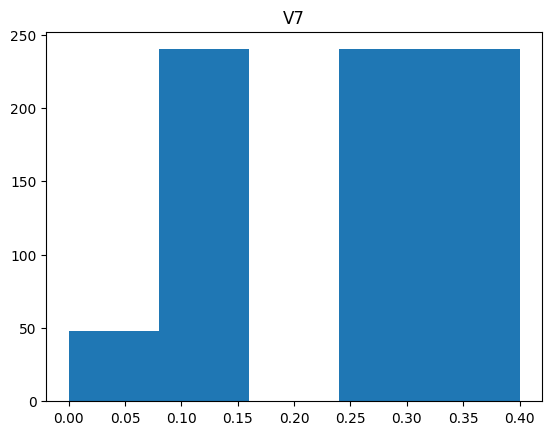

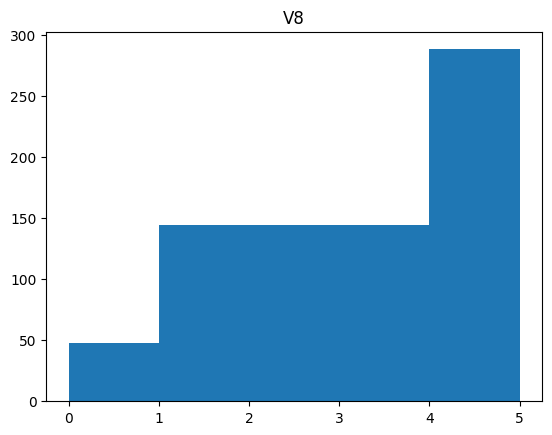

In [ ]:
import matplotlib.pyplot as plt
for col in X.columns:
  plt.hist(X[col], bins=5)
  plt.title(col)
  plt.show()

Постройте модель машинного обучения, обучите ее на всем датасете. (Доп. Разбейте датасет на обучающую и тестовую выборки. Обучите модель на первой, а измерьте ее эффективность на второй.)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logistic = LogisticRegression()

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.1, random_state=42)
model = LogisticRegression(max_iter= 500)
model.fit(X_train, y1_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.1, random_state=42)
model2 = LogisticRegression(max_iter= 500)
model2.fit(X_train, y2_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

**Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.**

In [ ]:
model2.score(X_test, y2_test)

0.16883116883116883

In [ ]:
model.score(X_test, y1_test)

0.16883116883116883

Вывод: модель плохо обучена и применять ее на практике не следует

**Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.**


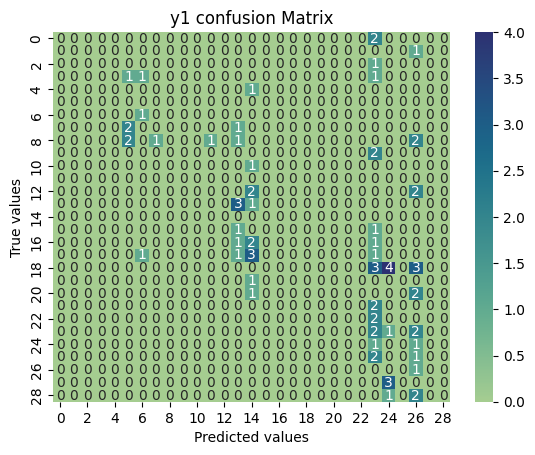

In [ ]:
import seaborn as sns
from sklearn import metrics
y1_pred = model.predict(X_test)
conf_mat = metrics.confusion_matrix(y1_test, y1_pred)
sns.heatmap(conf_mat, cmap="crest", annot=True)
plt.title("y1 confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()

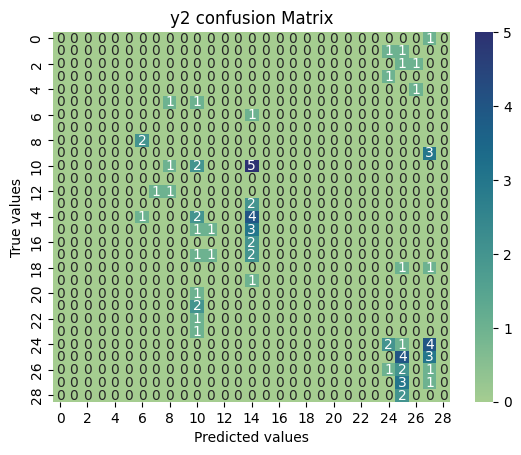

In [ ]:

import seaborn as sns
from sklearn import metrics
y2_pred = model2.predict(X_test)
conf_mat = metrics.confusion_matrix(y2_test, y2_pred)
sns.heatmap(conf_mat, cmap="crest", annot=True)
plt.title("y2 confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()

**Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.**


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Обучим модели предсказывать y1

In [ ]:
models= [LogisticRegression(max_iter= 500 ), SVC(kernel='rbf'), SVC(kernel='linear'), SVC(kernel='sigmoid'), SVC(kernel='poly'),
         KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=15),
         MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, max_iter=200),
         MLPClassifier(hidden_layer_sizes=(150, ), activation='relu', solver='adam', alpha=0.0001, max_iter=500),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=42),
         BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
         PassiveAggressiveClassifier(max_iter=1000, random_state=42), RidgeClassifier(alpha=1.0, random_state=42)]
for model in models:
  model.fit(X_train, y1_train)
  y_pred = model.predict(X_test)
  print(model)
  print(f"score = {model.score(X_test, y1_test)}")
  print()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)
score = 0.16883116883116883

SVC()
score = 0.09090909090909091

SVC(kernel='linear')
score = 0.2857142857142857

SVC(kernel='sigmoid')
score = 0.03896103896103896

SVC(kernel='poly')
score = 0.2077922077922078

KNeighborsClassifier()
score = 0.4025974025974026

KNeighborsClassifier(n_neighbors=10)
score = 0.11688311688311688

KNeighborsClassifier(n_neighbors=15)
score = 0.24675324675324675

MLPClassifier()
score = 0.15584415584415584

MLPClassifier(hidden_layer_sizes=(150,), max_iter=500)
score = 0.11688311688311688

DecisionTreeClassifier()
score = 0.6753246753246753

GaussianNB()
score = 0.36363636363636365

RandomForestClassifier(random_state=42)
score = 0.6233766233766234

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)
score = 0.6753246753246753

PassiveAggressiveClassifier(random_state=42)
score = 0.03896103896103896

RidgeClassifier(random_state=42)
score = 0.23376623376623376



Обучим модели предсказывать y2

In [ ]:
models= [LogisticRegression(max_iter= 500 ),
         KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=15),
         MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, max_iter=200),
         MLPClassifier(hidden_layer_sizes=(150, ), activation='relu', solver='adam', alpha=0.0001, max_iter=500),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=42),
         BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
         PassiveAggressiveClassifier(max_iter=1000, random_state=42), RidgeClassifier(alpha=1.0, random_state=42)]
for model in models:
  model.fit(X_train, y2_train)
  y_pred = model.predict(X_test)
  print(model)
  print(f"score = {model.score(X_test, y2_test)}")
  print()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)
score = 0.16883116883116883

SVC()
score = 0.22077922077922077

KNeighborsClassifier()
score = 0.36363636363636365

KNeighborsClassifier(n_neighbors=10)
score = 0.11688311688311688

KNeighborsClassifier(n_neighbors=15)
score = 0.23376623376623376

MLPClassifier()
score = 0.19480519480519481

MLPClassifier(hidden_layer_sizes=(150,), max_iter=500)
score = 0.15584415584415584

DecisionTreeClassifier()
score = 0.5584415584415584

GaussianNB()
score = 0.45454545454545453

RandomForestClassifier(random_state=42)
score = 0.5844155844155844

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)
score = 0.5844155844155844

PassiveAggressiveClassifier(random_state=42)
score = 0.06493506493506493

RidgeClassifier(random_state=42)
score = 0.22077922077922077



Выводы: для предскзания y1 лучше всего подходят DecisionTreeClassifier и BaggingClassifier, а для предсказания y2 RandomForestClassifier и BaggingClassifier.